In [26]:
%reload_ext autoreload
%autoreload 2

In [3]:
from visualstoryteller.getonepic import getonepic

[nltk_data] Downloading package brown to /Users/ger/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [4]:
text = "The brown bear goes to get some strawberries to the forest"

32768/30136 [================================] - 0s 0us/step


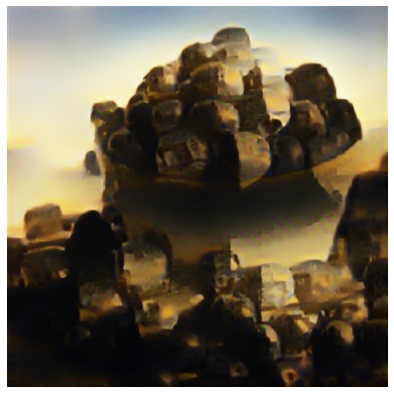

Thanks to Joanna Kosinska and Jude Beck for the pictures
Profiles: https://unsplash.com/@joannakosinska and https://unsplash.com/@judebeck


In [5]:
result = getonepic(text, show_result=True)
print(f"Thanks to {result['content'][1]} and {result['style'][1]} for the pictures")
print(f"Profiles: {result['content'][2]} and {result['style'][2]}")

In [10]:
import numpy as np
img = np.array(result['image'][0])

In [16]:
list_image = list(img.reshape(384*384*3))

In [17]:
array_image = np.array(list_image).reshape((384,384,3))

In [3]:
from visualstoryteller.getmorepics import getmorepics
from visualstoryteller.getmorepics_onestyle import getmorepics_onestyle

In [24]:
text = "because you took so much time to pee, and now you dance around, we lost all the money in coins"

In [5]:
result = getmorepics(text)


16384/13611 [====================================] - 0s 0us/step


In [19]:
import matplotlib.pyplot as plt

In [23]:
lenn = len(result['image'])
plt.figure(figsize=(13,4))
for i in range(lenn):
    plt.subplot(1, lenn, i+1)
    plt.imshow(result['image'][i][0])
    plt.axis(False)
plt.show()

49152/45144 [================================] - 0s 0us/step


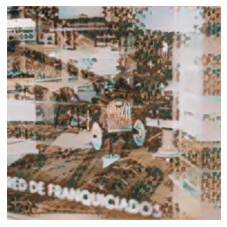

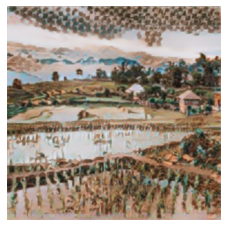

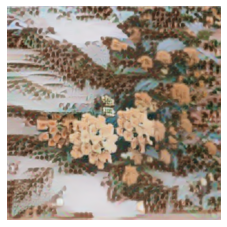

In [8]:
result = getmorepics_onestyle(text)
lenn = len(result['image'])
for i in range(lenn):
    plt.figure(figsize=(13,4))
    plt.subplot(1,lenn,i+1)
    plt.imshow(result['image'][i][0])
    plt.axis(False)

In [1]:
from visualstoryteller.getmorewords import get_more_words

In [4]:
text = "They’ve been working so hard in this crisis, many of them have died. Shadow health secretary Jonathan Ashworth says the government's proposed 1% NHS pay rise in England is a 'kick in the teeth' for staff."
print(get_more_words(text,14))

(['crisis', 'Shadow', 'health', 'secretary', 'Jonathan', 'Ashworth', 'governments', 'NHS', 'pay', 'rise', 'England', 'kick', 'teeth', 'staff'], ['died', 'thinks', 'some', 'Is', 'Working', 'have', 'hospital', 'because', 'because', 'few', 'has', 'toughest', 'difficult', 'work', 'been', 'already', 'seemed', 'proposes', 'had', 'perished', 'countless', 'so', 'Tough', 'Has', 'Work', 'propose', 'seem', 'proposing'])


49152/43010 [==================================] - 0s 1us/step


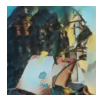

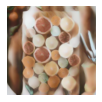

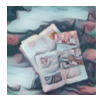

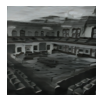

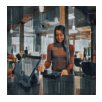

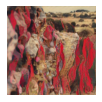

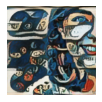

In [3]:
import matplotlib.pyplot as plt
from visualstoryteller.getmorepics_twonouns import getmorepics_twonouns
text = "They’ve been working so hard in this crisis, many of them have died. Shadow health secretary Jonathan Ashworth says the government's proposed 1% NHS pay rise in England is a 'kick in the teeth' for staff."
result = getmorepics_twonouns(text)
lenn = len(result['image'])
for i in range(lenn):
    plt.figure(figsize=(13,4))
    plt.subplot(1,lenn,i+1)
    plt.imshow(result['image'][i][0])
    plt.axis(False)

In [5]:
a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
print(len(a))

14


In [15]:
i=2

In [16]:
a[2*i: 2*i+2]
a[4*i: 4*i+4]

[9, 10, 11, 12]

In [19]:
a[0:15]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [4]:
14//2

7